CNN 理論與實作 LLH @NCCU MITC 2021.05.10

# ```TensorFlow``` 與 ```Keras```

- Kera 的創建者: Google AI 開發人員 Francois Chollet (2015.03.27 發布) 
- TensorFlow 的創建者: Google 大腦 (Google Brain) (2015.11.09 發布)

## TensorFlow 與 Kera 的關係:

參考資料: [TensorFlow 2.0中的tf.keras和Keras有何區別？為什麼以後一定要用tf.keras？](https://www.jiqizhixin.com/articles/2019-12-09-10) 

- 後端是一個計算引擎: 它可以構建網絡的圖和拓撲結構，運行優化器，並執行具體的數字運算。  
- 試想你需要從頭開始構建一個網站。你可以使用 PHP 編程語言和 SQL 數據庫。這個 SQL 數據庫就是是後端。你可以使用MySQL，PostgreSQL 或者 SQL Server 作為你的數據庫。
---
- TensorFlow 從 Keras v1.1.0 發行版開始成為 Keras 的默認後端。
- Google 於 2019 年 6 月發布 TensorFlow 2.0 並宣布 Keras 現在是 TensorFlow 的官方高級API，用於快速簡單的模型設計和訓練。

TensorFlow 2.0 特性:  
- Sessions 和eager execution
- 自動求導
- 模型和層的子類化
- 更好的多GPU /分佈式訓練支持

安裝 ```tensorflow```: ```conda install tensorflow```

# CNN:

### 1. What is CNN?

- 由法裔計算機科學家 楊立昆（法語：Yann Le Cun) 提出。
- 做影像辨識最好的工具之一。

###  CNN 的模型想法:

- 上禮拜教的 NN 都是 fully-connected layers (一個對一個)，但 CNN 新增的 layers (Convolution 與 Pooling) 不是 fully-connected layer。 
- 影像辨識: 只需讓機器學習圖片中的重點特徵。舉例 (見下圖):
- 因此，如果能夠創造一個過濾器，用來掃描整張圖片，並把重點記錄下來，就可以節省所需的參數。

![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

###  CNN 模型架構

#### <font color='red'>Convolution Layer (卷積層)</font>: 指定 ```filter``` 的 ```kernel```、```padding```、```stride```。
- ```Kernel```: 
    - 卷積核。又稱為 filter、features dectectors。
    - 一個 kernel 代表一個我們想要觀察的特徵，通常一層 CNN 會有 32 個 filters。  
- ```Padding```: 
    - 目的: 確保經過 CNN 後的 output (稱為 ```response map```)大小跟原來的 input 一樣。  
    - 原因: 圖片再經過 filter 後會變小 (可以自己畫畫看)，如果要做很多層 CNN，可能到最後無法做 filter。
    - 做法: 決定一個填充值 (通常機器會自己判斷)，機器將圖片填滿 (填入的數字均為 0)使得最後的 feature map 大小與 input 相同。
- ```Stride```: 
    - 目的: 做完一次 filter 後，要繼續往右邊走來讀取整張圖片。
    - 做法: 通常是 1。
- 最終 feature map 的大小取決於 ```Padding``` 與 ```Stride```。

#### <font color='red'>Pooling Layer (池化層) </font>: 指定 ```pool size```。

再經過 Convolution Layer 後，會得到太多 feature maps (如果有 32 個 filters，就會有 32 張 feature maps，稱為 depth = 32)。 
太多資料會讓機器學習的效率變差，因此資料每通過一層 feature map，會再通過 pooling layer 讓 output 變小。

- 做法: 把 feature map 分割成數個區域，再依據選擇的是 Max、Min、Average Pooling... (通常是用 Max Pooling) 決定每個區域的代表值。   

做完 Convoluation layers 與 Pooling layers 後，最終的產物是許多的 feature maps (2*2 的 <font color='blue'> 矩陣 </font>)。  
但不要忘記影像辨識最終的目的是要判斷該圖片為何種物件。因此要把 <font color='blue'> 矩陣 </font> 轉為 <font color='blue'> 向量 </font>。<font color='green'> 做法是再加一層 FC (Fully Connected) layer。

### 補充: 關於圖片...

圖片是三維資料，三維分別指的是:   
- 影像的長
- 影像的寬
- color channel(位元色板) [參考資料](https://www.oxxostudio.tw/articles/201406/color-channel.html)
---
![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)
如此圖所示，一張照片有其長和寬，而一層 (depth=1)代表一個 pixel，一個 pixel 是一個介於 0-255 的數字。  
三層 (一般 RGB 照片, depth=3) 則代表每一個 pixel 有三個數字 (其中每個數字都介於 0-255)。

---

# CNN 實作:

[資料來源: **CIFAR Image Dataset**](https://www.cs.toronto.edu/~kriz/cifar.html)  
說明:  
共有 60000 筆 32*32 的彩色圖片，圖片的內容是 10 個日常生活中的物件 (每個物件有 6000 筆資料)，這 10 個物件包含:  
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

## 1. import 相關套件:

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 把資料讀入:

In [25]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [30]:
train_labels.shape

(50000, 1)

In [5]:
train_images[9487]

array([[[244, 244, 244],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [117, 117, 117],
        [131, 131, 131],
        [138, 138, 138]],

       [[244, 244, 244],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [123, 123, 123],
        [134, 134, 134],
        [138, 138, 138]],

       [[248, 248, 248],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [121, 121, 121],
        [125, 125, 125],
        [127, 127, 127]],

       ...,

       [[133, 133, 133],
        [125, 125, 125],
        [122, 122, 122],
        ...,
        [ 41,  41,  41],
        [ 62,  62,  62],
        [ 74,  74,  74]],

       [[132, 132, 132],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [ 45,  45,  45],
        [ 60,  60,  60],
        [ 70,  70,  70]],

       [[134, 134, 134],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [ 53,  53,  53],
        [ 62,  62,  62],
        [ 68,  68,  68]]

## 3. 資料處理:

In [31]:
train_images[900]

array([[[196, 194, 188],
        [136, 126, 105],
        [143, 114,  79],
        ...,
        [126,  50,  39],
        [126,  51,  39],
        [126,  55,  41]],

       [[154, 142, 122],
        [153, 111,  77],
        [165,  95,  58],
        ...,
        [152,  85,  66],
        [158,  93,  74],
        [155,  98,  80]],

       [[196, 131, 117],
        [197, 101,  81],
        [182,  93,  71],
        ...,
        [145,  94,  75],
        [135,  84,  66],
        [124,  78,  64]],

       ...,

       [[ 50,  62,  69],
        [ 49,  61,  68],
        [ 46,  58,  65],
        ...,
        [102, 104, 103],
        [106, 107, 107],
        [104, 104, 104]],

       [[ 52,  65,  71],
        [ 53,  66,  72],
        [ 56,  69,  75],
        ...,
        [103, 109, 110],
        [104, 109, 110],
        [104, 106, 108]],

       [[ 78,  91,  97],
        [ 82,  95, 101],
        [ 84,  97, 103],
        ...,
        [ 96, 105, 108],
        [ 93, 102, 105],
        [ 96, 102, 106]]

In [32]:
# normalize pixel values to 0~1:
train_images, test_images = train_images / 255.0, test_images / 255.0

# create classes for the images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [33]:
train_images[900]

array([[[0.76862745, 0.76078431, 0.7372549 ],
        [0.53333333, 0.49411765, 0.41176471],
        [0.56078431, 0.44705882, 0.30980392],
        ...,
        [0.49411765, 0.19607843, 0.15294118],
        [0.49411765, 0.2       , 0.15294118],
        [0.49411765, 0.21568627, 0.16078431]],

       [[0.60392157, 0.55686275, 0.47843137],
        [0.6       , 0.43529412, 0.30196078],
        [0.64705882, 0.37254902, 0.22745098],
        ...,
        [0.59607843, 0.33333333, 0.25882353],
        [0.61960784, 0.36470588, 0.29019608],
        [0.60784314, 0.38431373, 0.31372549]],

       [[0.76862745, 0.51372549, 0.45882353],
        [0.77254902, 0.39607843, 0.31764706],
        [0.71372549, 0.36470588, 0.27843137],
        ...,
        [0.56862745, 0.36862745, 0.29411765],
        [0.52941176, 0.32941176, 0.25882353],
        [0.48627451, 0.30588235, 0.25098039]],

       ...,

       [[0.19607843, 0.24313725, 0.27058824],
        [0.19215686, 0.23921569, 0.26666667],
        [0.18039216, 0

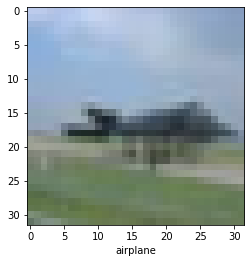

In [43]:
# check the image
IMG_INDEX = 600
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## 4. 規劃神經網路

本例使用:  
1. 一層 Convolution (filter 大小: 3*3、數量: 32)
2. 一層 Max Pooling (2*2、stride = 2)
3. 一層 Convolution (filter 大小: 3*3、數量: 64)
4. 一層 Max Pooling (2*2、stride = 2)
5. 一層 Fully connected NN

In [44]:
model = models.Sequential() # create a blank model

In [45]:
# 第一次 Convolution + Max Pooling
model.add(layers.Conv2D(32, (3, 3), activation='softmax', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 第二次 Convolution + Max Pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

## 5. 查看初步模型情況 ( <font color='green'>.summary()</font> )

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


觀察 ```Output Shape```，你是否可以解釋結果?

## 6. 新增 FC (Fully Connected) layer ( <font color='green'>.add()</font> )

In [47]:
model.add(layers.Flatten()) # 將 6*6*64 拉成單維。
model.add(layers.Dense(64, activation='relu')) # fully dense
model.add(layers.Dense(10)) # output 必須是 10。

## 7. Compile the model ( <font color='green'>.compile()</font> )

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 8. Fit (the data to) the model  (<font color='green'> .fit() </font>)

參數說明:  
```epochs```: 訓練過程中數據被「輪」多少次。  
```validation_data```: 訓練過程中用給定的資料 evaluate。

In [62]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.8752 - acc: 0.3189 - val_loss: 1.6168 - val_acc: 0.4184
Epoch 2/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.5336 - acc: 0.4447 - val_loss: 1.4627 - val_acc: 0.4718
Epoch 3/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.4488 - acc: 0.4810 - val_loss: 1.4117 - val_acc: 0.4949
Epoch 4/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.3907 - acc: 0.5019 - val_loss: 1.4198 - val_acc: 0.4876
Epoch 5/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.3416 - acc: 0.5186 - val_loss: 1.3419 - val_acc: 0.5190
Epoch 6/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.3061 - acc: 0.5339 - val_loss: 1.3056 - val_acc: 0.5358
Epoch 7/10
50000/50000 [==============================] - 135s 3ms/sample - loss: 1.2762 - acc: 0.5448 - val_loss: 1

In [49]:
history

## 9. 查看模型的準確度  (<font color='green'> .evaluate() </font>):

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

10000/10000 - 4s - loss: 2.3028 - acc: 0.1017
0.1017


In [52]:
predictions = model.predict(test_images)

In [61]:
predictions[1000]

array([ 0.01681134, -0.0302102 ,  0.00428864,  0.0116974 , -0.01027543,
       -0.002516  ,  0.01255328,  0.01789701, -0.0128179 , -0.00728659],
      dtype=float32)

```predicitions``` 是一個 ```numpy arrary```    
這 10 個數字代表的是 <font color='red'> probability distribution </font>。

In [59]:
np.argmax(predictions[9000]) 

7

```.argmax()``` 回傳 array 的最大值。因此經由我們的神經網路訓練後，機器認為第 9487 筆 testing data，是編號 ```1``` 的物件。  
來看看第 ```1``` 個 index 是甚麼:
```python
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
```
把圖畫出來:

In [55]:
%matplotlib inline

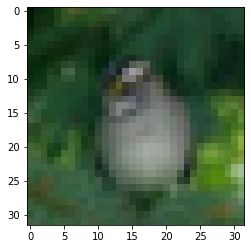

In [56]:
plt.figure()
plt.imshow(test_images[900]) 
plt.grid(False)
plt.show()

In [21]:
test_labels[1564] # 機器判斷正確!

array([1], dtype=uint8)

## 10. 改善模型的準確度:

試著套用不同的 activation functions、loss function、optimizer，看看哪一種組合可以得到最好的學習效果:

## 補充: Data Augmentation(增廣)

上到這邊可以發現，CNN 要 train 的好，關鍵是讓電腦學習 input data 的 features。如果 input data (i.e. images) 太少，那機器可能就無法分辨不同物體。但有時資料就是這麼少，這時就可以用 data augmentation。  
所謂的 data augmentation，就是 <font color='red'> 把原始圖片做處理 (eg 旋轉、壓縮、拉長) 使資料量變大，同時不會導致 overfitting 的問題。</font>

Using TensorFlow backend.


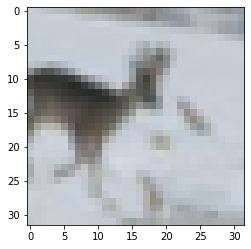

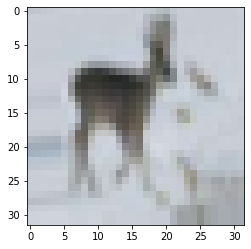

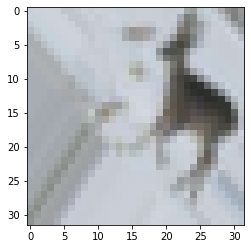

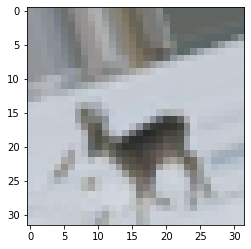

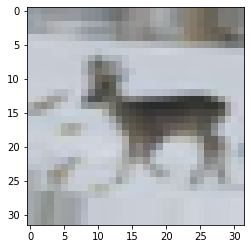

In [22]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
# 將 input data(圖片)做一些處理。
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
#-------------------------------------------------------------------------------------------------------------------------

# 隨便挑一張來測試:
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0
# this loops runs forever until we break, saving images to current directory with specified prefix
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

# Terms

## Cross Entropy

公式:  
$$H(p, q) = -\sum_{x}p(x)\ log(q(x))$$  
$$p = 真實分布, q = 模型預測的分布$$

Cross Entropy vs MSE:
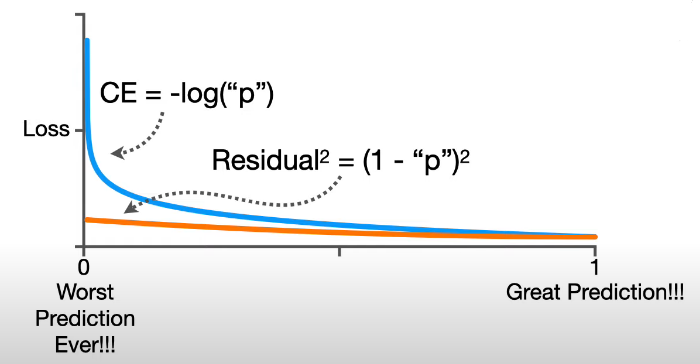

使用 Cross Entropy 會將模型預測誤差極大的部分放大，使之後做 back propagation 時能學習的更有效率。